In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Load the California housing dataset
california_housing = fetch_california_housing()

# Create DataFrame with features
housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
housing_labels = california_housing.target  # This is already the target array

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    housing, housing_labels, test_size=0.2, random_state=42
)

# Identify numerical columns (all columns in this dataset are numerical)
num_columns = X_train.columns.tolist()

# Create preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

# Create column transformer (only numerical pipeline since all features are numerical)
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
])

# Prepare the training data
housing_prepared = preprocessor.fit_transform(X_train)

# Now define your parameter grid and run the grid search
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, y_train)  # Use y_train instead of housing_labels

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE score:", np.sqrt(-grid_search.best_score_))

# You can also check the best estimator
best_forest_reg = grid_search.best_estimator_
print("Best estimator:", best_forest_reg)

Best parameters: {'max_features': 2, 'n_estimators': 30}
Best RMSE score: 0.5080549938463517
Best estimator: RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)


In [2]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [3]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [4]:
#QUESTION 2: Look at the score of each hyperparameter combina�on tested during the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6245338646699863 {'max_features': 2, 'n_estimators': 3}
0.5374726025780652 {'max_features': 2, 'n_estimators': 10}
0.5080549938463517 {'max_features': 2, 'n_estimators': 30}
0.5974207063820612 {'max_features': 4, 'n_estimators': 3}
0.5280476980276422 {'max_features': 4, 'n_estimators': 10}
0.5102263064320371 {'max_features': 4, 'n_estimators': 30}
0.5962161278592699 {'max_features': 6, 'n_estimators': 3}
0.5337805355017322 {'max_features': 6, 'n_estimators': 10}
0.5159476822709024 {'max_features': 6, 'n_estimators': 30}
0.6005957897242895 {'max_features': 8, 'n_estimators': 3}
0.5372972486044904 {'max_features': 8, 'n_estimators': 10}
0.5191274707888076 {'max_features': 8, 'n_estimators': 30}
0.6062264596768497 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5244907698347514 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5944833660963391 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5248593174756421 {'bootstrap': False, 'max_features': 3, 'n

In [5]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133003,0.021145,0.004158,0.000623,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.415588,-0.387220,...,-0.390043,0.013706,18,-1.094876e-01,-9.778314e-02,-1.042639e-01,-1.030416e-01,-1.037626e-01,-1.036678e-01,3.721719e-03
1,0.423734,0.018134,0.011518,0.001678,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.301266,-0.290839,...,-0.288877,0.009097,11,-5.449639e-02,-5.270741e-02,-5.340137e-02,-5.517739e-02,-5.411397e-02,-5.397931e-02,8.570457e-04
2,1.537819,0.310960,0.037632,0.009287,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.265111,-0.259061,...,-0.258120,0.004960,1,-4.056791e-02,-3.992142e-02,-4.003912e-02,-4.091483e-02,-4.024990e-02,-4.033863e-02,3.622760e-04
3,0.250001,0.028086,0.005210,0.001513,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.353764,-0.365161,...,-0.356912,0.009104,15,-9.365610e-02,-9.057114e-02,-9.440927e-02,-9.323148e-02,-9.855199e-02,-9.408400e-02,2.581425e-03
4,0.843715,0.038510,0.014138,0.002132,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.277657,-0.286564,...,-0.278834,0.004050,8,-5.196488e-02,-5.088438e-02,-5.137413e-02,-5.291997e-02,-5.230995e-02,-5.189066e-02,7.099568e-04
5,2.622102,0.097036,0.038470,0.003814,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.261958,-0.260461,...,-0.260331,0.004437,2,-4.098471e-02,-3.996631e-02,-4.005720e-02,-4.088360e-02,-4.050609e-02,-4.047958e-02,4.149560e-04
6,0.374225,0.038491,0.004369,0.000147,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.370883,-0.352977,...,-0.355474,0.008407,14,-9.343030e-02,-8.920307e-02,-8.969567e-02,-9.433783e-02,-9.446649e-02,-9.222667e-02,2.300895e-03
7,1.195878,0.021968,0.013186,0.001015,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.289774,-0.292781,...,-0.284922,0.006154,9,-5.152866e-02,-5.180500e-02,-5.197018e-02,-5.381893e-02,-5.244396e-02,-5.231335e-02,8.094129e-04
8,3.554935,0.251672,0.035255,0.006694,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.265830,-0.274554,...,-0.266202,0.004305,3,-4.049727e-02,-4.085842e-02,-4.073144e-02,-4.159658e-02,-4.070027e-02,-4.087680e-02,3.780898e-04
9,0.405397,0.015762,0.004727,0.000593,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.364449,-0.366013,...,-0.360715,0.007588,16,-9.383136e-02,-9.069117e-02,-9.217174e-02,-9.775431e-02,-9.677801e-02,-9.424532e-02,2.676962e-03


Randomized Search

#3. Perform a randomized search

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Load the California housing dataset
california_housing = fetch_california_housing()

# Create DataFrame with features
housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
housing_labels = california_housing.target  # Full dataset labels (20640 samples)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    housing, housing_labels, test_size=0.2, random_state=42
)

# Identify numerical columns (all columns in this dataset are numerical)
num_columns = X_train.columns.tolist()

# Create preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

# Create column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
])

# Prepare the training data (this will have 16512 samples)
housing_prepared = preprocessor.fit_transform(X_train)

# Now use the correct target variable (y_train with 16512 samples)
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, y_train)  # Use y_train instead of housing_labels

# Print the best parameters and score
print("Best parameters:", rnd_search.best_params_)
print("Best RMSE score:", np.sqrt(-rnd_search.best_score_))

# You can also evaluate on the test set
X_test_prepared = preprocessor.transform(X_test)
test_score = rnd_search.score(X_test_prepared, y_test)
print("Test set RMSE:", np.sqrt(-test_score))

Best parameters: {'max_features': 3, 'n_estimators': 75}
Best RMSE score: 0.49584568800311674
Test set RMSE: 0.4952172190519384


In [7]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5081858032222906 {'max_features': 7, 'n_estimators': 180}
0.5299647111872531 {'max_features': 5, 'n_estimators': 15}
0.4966217237619964 {'max_features': 3, 'n_estimators': 72}
0.5218103468217379 {'max_features': 5, 'n_estimators': 21}
0.5088040448738792 {'max_features': 7, 'n_estimators': 122}
0.49584568800311674 {'max_features': 3, 'n_estimators': 75}
0.4971514888015999 {'max_features': 3, 'n_estimators': 88}
0.5055845666444362 {'max_features': 5, 'n_estimators': 100}
0.4966269469467106 {'max_features': 3, 'n_estimators': 150}
0.6520341603807847 {'max_features': 5, 'n_estimators': 2}


Analyze the Best Models and Their Errors

In [8]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.3371155 , 0.05943083, 0.13118241, 0.04822728, 0.03618731,
       0.12628253, 0.13500923, 0.1265649 ])

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Create a custom transformer for adding extra attributes
class ExtraAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]  # total_rooms / households
        population_per_household = X[:, 5] / X[:, 6]  # population / households

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]  # total_bedrooms / total_rooms
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# First, let's define the numerical attributes for the California housing dataset
num_attribs = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
               'Latitude', 'Longitude']

# Create the full pipeline with feature engineering
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', ExtraAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler()),
])

# Since California housing dataset has only numerical features, we only need the numerical pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

# Fit the pipeline to your data
housing_prepared = full_pipeline.fit_transform(X_train)

# Now you can run your original code
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# For numerical features only (no categorical encoder in this dataset)
# Since we don't have categorical features, we'll adjust the code:
num_transformer = full_pipeline.named_transformers_['num']
attributes = num_attribs + extra_attribs

# Get feature importances from your trained model
feature_importances = grid_search.best_estimator_.feature_importances_

# Sort and display feature importances
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.33711550310883365), 'MedInc'),
 (np.float64(0.1350092349453803), 'Latitude'),
 (np.float64(0.13118240903466769), 'AveRooms'),
 (np.float64(0.12656490398619746), 'Longitude'),
 (np.float64(0.126282527015887), 'AveOccup'),
 (np.float64(0.059430827740882666), 'HouseAge'),
 (np.float64(0.048227280938248886), 'AveBedrms'),
 (np.float64(0.03618731322990234), 'Population')]

## Evaluate Your System on the Test Set

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the California housing dataset
california_housing = fetch_california_housing()
housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
housing["median_house_value"] = california_housing.target

# Create income category for stratification (important for housing data)
housing["income_cat"] = pd.cut(housing["MedInc"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Create stratified train-test split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Remove income_cat column as it was only for stratification
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Prepare the data
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Make sure you have full_pipeline defined (from previous steps)
# If not, define it here:
num_attribs = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
               'Latitude', 'Longitude']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

# Fit the pipeline on the training data and transform test data
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()

# Fit the pipeline on training data
full_pipeline.fit(X_train)

# Transform test data
X_test_prepared = full_pipeline.transform(X_test)

# Make predictions and calculate final RMSE
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE: {final_rmse:.4f}")

Final RMSE: 0.3203


In [11]:
final_rmse

np.float64(0.32034133702016315)

We can compute a 95% confidence interval for the test RMSE:

In [14]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.30371719, 0.33614433])

We could compute the interval manually like this:

In [15]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(0.30371719332056757), np.float64(0.33614433044335057))

Alternatively, we could use a z-scores rather than t-scores:

In [16]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(np.float64(0.30372220220788465), np.float64(0.3361398046850808))


## Model persistence using joblib

In [17]:
from sklearn.pipeline import Pipeline

# Create the full pipeline that includes both preprocessing and the predictor
full_pipeline_with_predictor = Pipeline([
    ('preprocessing', full_pipeline),  # Your existing preprocessing pipeline
    ('random_forest', final_model)     # Your trained model
])

# Now you can assign it to my_model
my_model = full_pipeline_with_predictor

# Test that it works by making a prediction on the test set
# The pipeline will automatically preprocess the data and then make predictions
test_predictions = my_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Pipeline test RMSE: {test_rmse:.4f}")

Pipeline test RMSE: 0.3203


In [18]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

Example SciPy distributions for RandomizedSearchCV



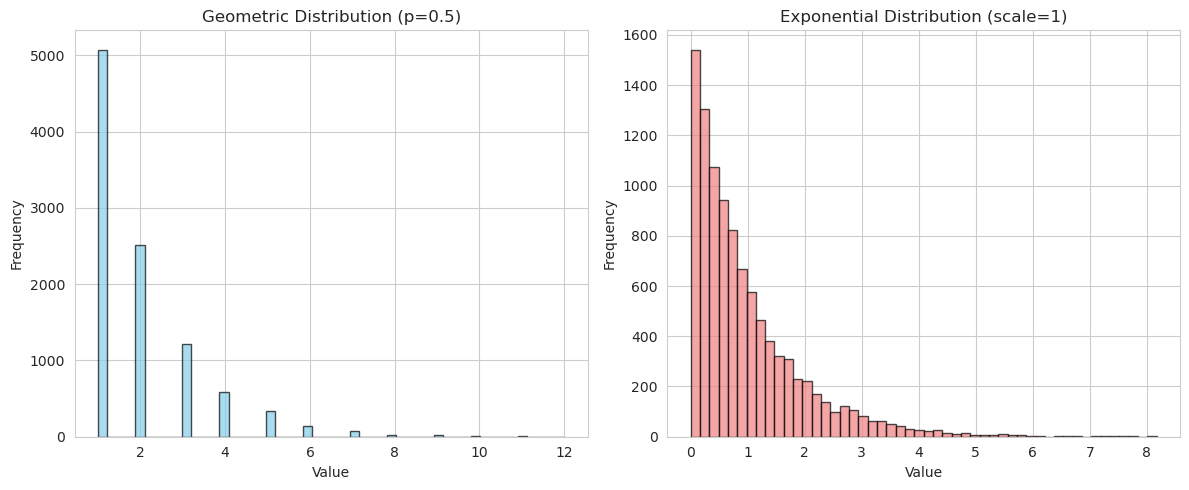

Geometric Distribution:
Mean: 1.97
Standard Deviation: 1.37
Min: 1, Max: 12

Exponential Distribution:
Mean: 0.98
Standard Deviation: 0.97
Min: 0.00, Max: 8.17


In [20]:
import matplotlib.pyplot as plt
from scipy.stats import geom, expon
import numpy as np

# Generate the distributions
geom_distrib = geom(0.5).rvs(10000, random_state=42)
expon_distrib = expon(scale=1).rvs(10000, random_state=42)

# Create subplots for better visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot geometric distribution
ax1.hist(geom_distrib, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Geometric Distribution (p=0.5)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Plot exponential distribution
ax2.hist(expon_distrib, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title('Exponential Distribution (scale=1)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print some statistics
print("Geometric Distribution:")
print(f"Mean: {np.mean(geom_distrib):.2f}")
print(f"Standard Deviation: {np.std(geom_distrib):.2f}")
print(f"Min: {np.min(geom_distrib)}, Max: {np.max(geom_distrib)}")

print("\nExponential Distribution:")
print(f"Mean: {np.mean(expon_distrib):.2f}")
print(f"Standard Deviation: {np.std(expon_distrib):.2f}")
print(f"Min: {np.min(expon_distrib):.2f}, Max: {np.max(expon_distrib):.2f}")